# Fourier transforms 

## From very naive approximations of the spectrum to more complex examples:


In [1]:
from __future__ import division
# redefine default figure size and fonts
import matplotlib as mpl
# mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif',size=14)
mpl.rc('figure',figsize=(10,8))

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Two basic ploting functions that repeat the actuall spectral analysis:

In [2]:
def spectrum(y,Fs):
    """
    Plots a Single-Sided Amplitude Spectrum of a sampled
    signal y(t), sampling frequency Fs (lenght of a signal 
    provides the number of samples recorded)
    
    Following: http://goo.gl/wRoUn
    """
    n = len(y) # length of the signal
    k = arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(np.int(n/2))] # one side frequency range
    Y = 2*np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(np.int(n/2))]
    return (frq, Y)


def plotSignal(A,ff,fs,N):

    T = N/fs # sampling period
    t = np.arange(0.0,T,T/N) # sampling time steps
    y = A*np.sin(2*np.pi*ff*t) # sampled signal
    frq,Y = spectrum(y,fs) # FFT(sampled signal)
    
    # Plot
    figure(figsize=(10,8))
    subplot(2,1,1)
    plot(t,y,'b:.')
    xlabel('$t$ [s]')
    ylabel('Y [V]')
    # axes().set_aspect(0.2)
    # title('sampled signal')
    subplot(2,1,2)
    plot(frq,abs(Y),'r') # plotting the spectrum
    xlabel('$f$ (Hz)')
    ylabel('$|Y(f)|$')
    
    
    

## More elaborate example, demonstration of a leakage effect:

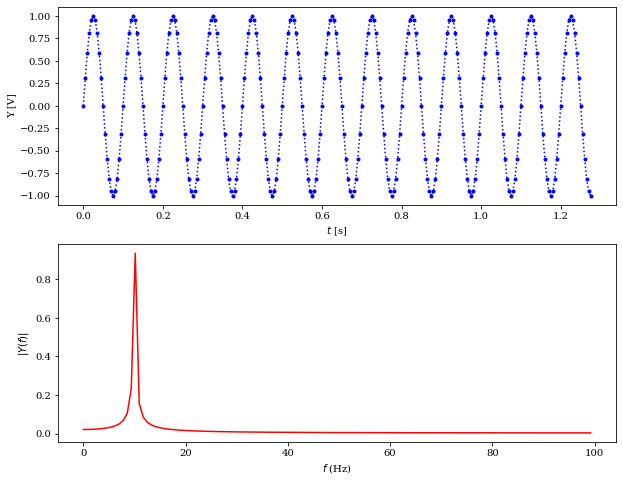

In [3]:
# We sample a signal at fs = 200 Hz and record 256 points"

A = 1.0 # Volt, amplitude
ff = 10.0 # Hz, signal frequency, zero harmonics


# We will work with different sampling frequencies
# and different lengths of records:

fs = 200.0 #Hz
N = 256 # points

plotSignal(A,ff,fs,N)

### Let us try to minimize the leakage problem

#### Let's first increase the sampling rate:

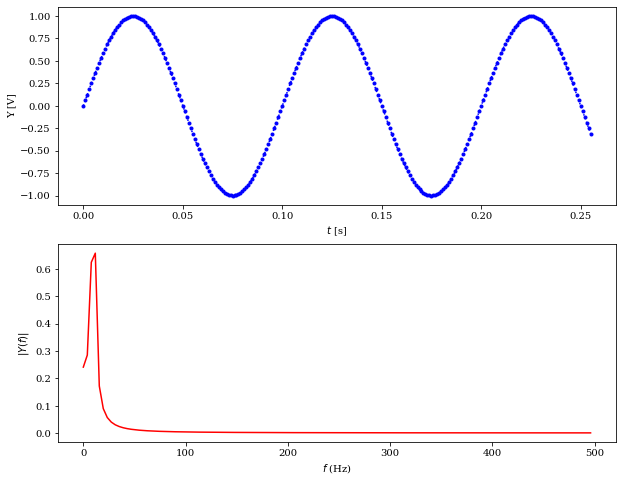

In [4]:
fs = 1000.0 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)

#### Let us try to minimize the leakage problem sampling close to the Nyquist

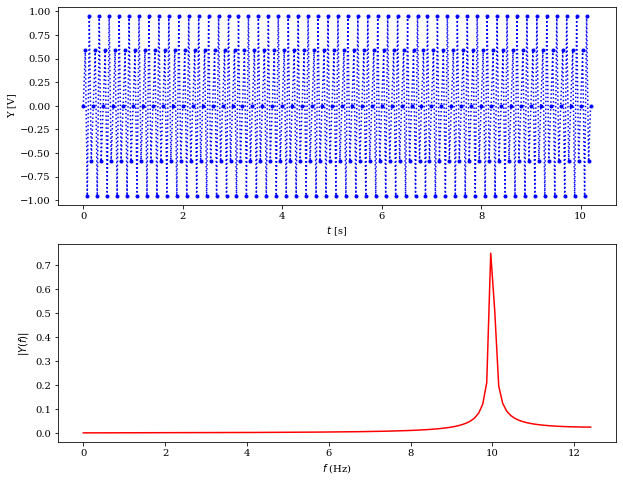

In [5]:
fs = 25.0 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)


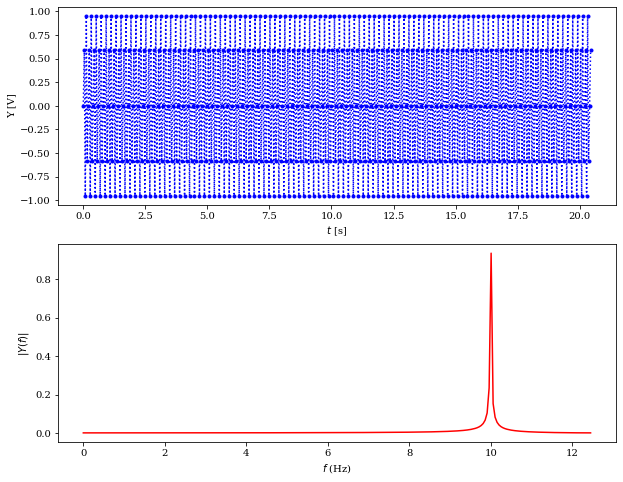

In [6]:
# Let's increase the number of points:
fs = 25.0 #Hz
N = 512 # points
plotSignal(A,ff,fs,N)

### See what the **perfect** FFT looks like:

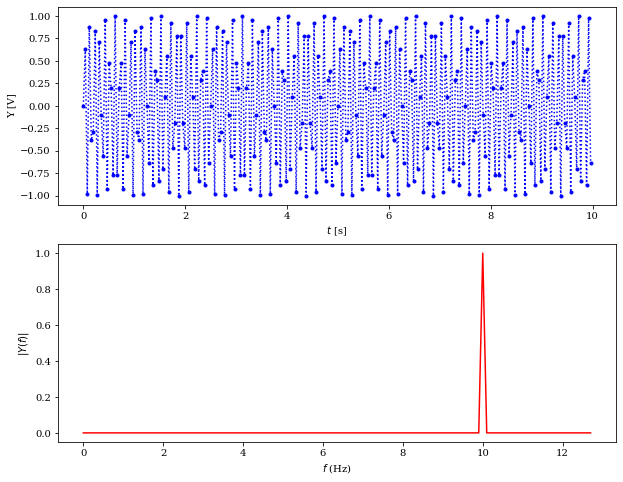

In [7]:
# Perfect FFT
# Let us try to minimize the leakage problem
fs = 25.6 #Hz
N = 256 # points
plotSignal(A,ff,fs,N)